### Multi linear regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [5]:
dataset=fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [6]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [8]:
print(dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
df=pd.DataFrame(dataset.data,columns=dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
df['Price']=dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [12]:
df.duplicated().any()

np.False_

<Axes: >

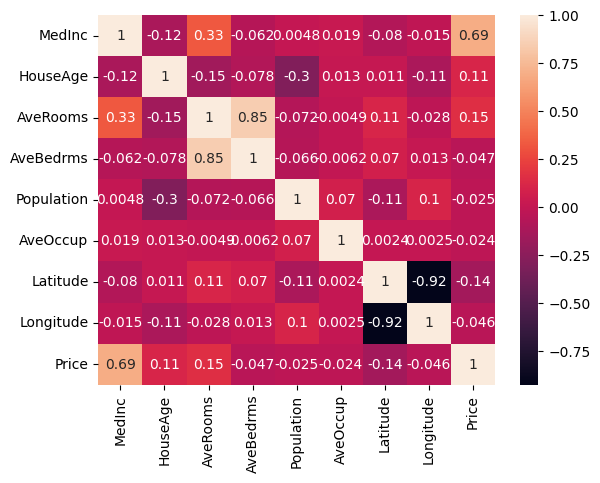

In [14]:
sns.heatmap(df.corr(),annot=True)

In [18]:
# Independent and dependent
X=df.iloc[:,:-1]
y=df['Price']

In [19]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [20]:
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.33, random_state=42) 

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [26]:
X_test=scaler.transform(X_test)

In [40]:
# Model trainig
model = LinearRegression() 
# fitting the model 
model.fit(X_train, y_train) 

LinearRegression()

In [41]:
model.intercept_

np.float64(2.0666362048018536)

In [42]:
y_pred=model.predict(X_test) 
y_pred

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279], shape=(6812,))

In [43]:
print('mean_squared_error : ', mean_squared_error(y_test, y_pred)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, y_pred)) 

mean_squared_error :  0.5369686543372459
mean_absolute_error :  0.5295710106684453


In [44]:
from sklearn.metrics import r2_score
score=r2_score(y_test, y_pred)
print(score)

0.5970494128783952


In [45]:
n=len(y_test)
k=1
adj_score=1-(((1-score)*(n-1))/(n-k-1))
print(adj_score)

0.596990242454442


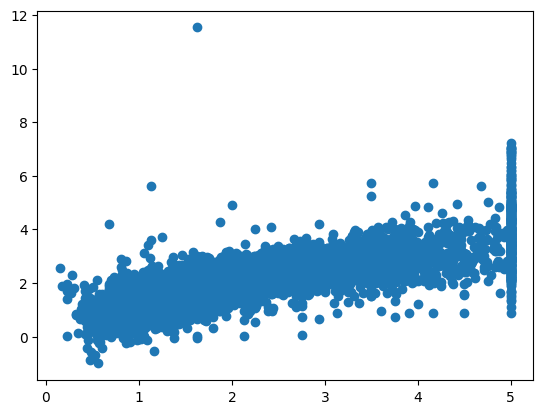

In [46]:
# Assumptions

plt.scatter(y_test,y_pred)

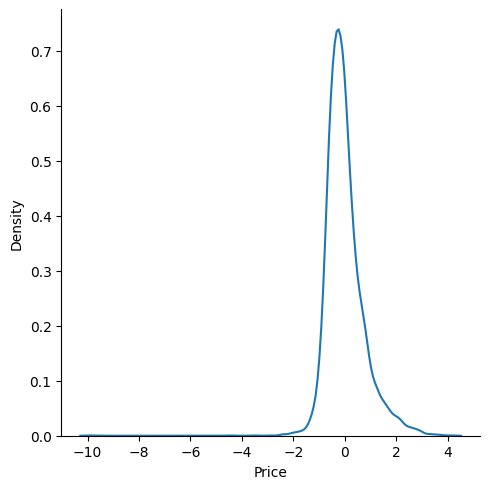

In [47]:
# Residuals
residuls=y_test-y_pred
residuls
sns.displot(residuls,kind='kde')

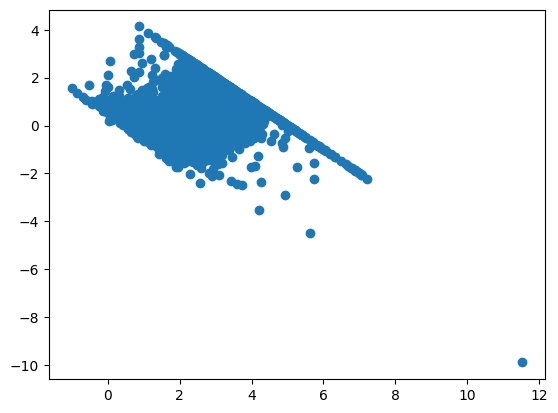

In [39]:
plt.scatter(y_pred,residuls)

In [48]:
import pickle
pickle.dump(model,open("regression.pkl",'wb'))


In [49]:
upload=pickle.load(open('regression.pkl','rb'))

In [50]:
upload.predict(X_test)

array([0.72563462, 1.76650223, 2.70545812, ..., 1.25803135, 1.66673014,
       2.25826279], shape=(6812,))